# By: Thomas Isola
## Class: PUI 2018
## HW #10 Assignment 1

In [1]:
# Import packages
import numpy as np
import scipy as sp
import statsmodels.formula.api as smf
import pylab as pl
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Set the alpha level
alpha = 0.05

In [3]:
# Download the Asc.csv file from Professor Bianco's Repository
ascURL = 'https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/Lab9_fb55/Asc.csv'
df = pd.read_csv(ascURL, header=None, names=['x', 'y1','tmp2', 'y2', 'tmp3', 'tmp4', 'tmp5', 'tmp6'], sep="\t")

In [4]:
# Display the dataframe
df

,x,y1,tmp2,y2,tmp3,tmp4,tmp5,tmp6
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [5]:
# Sort the values of the dataframe
df.sort_values(by='x', inplace=True)

In [6]:
# Display the dataframe
df

,x,y1,tmp2,y2,tmp3,tmp4,tmp5,tmp6
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
10,5.0,5.68,5.0,4.74,5.0,5.73,8.0,6.89
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71


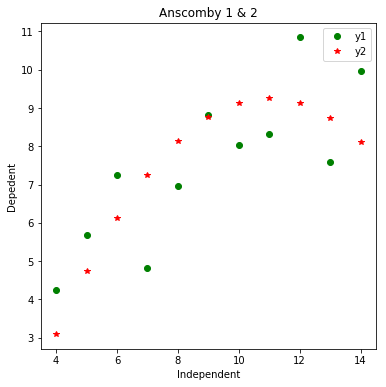

In [22]:
# Plot the data
pl.figure(figsize=(6,6))
pl.plot(df['x'], df['y1'], 'go', label = 'y1')
pl.plot(df['x'], df['y2'], 'r*', label = 'y2')
pl.xlabel('Independent')
pl.ylabel('Depedent')
pl.title('Anscomby 1 & 2');
pl.legend();

**Caption**: Above is a plot of the Asc.csv data provided by Professor Bianco. There are two sets of data, y1 (green circles) and y2 (red stars), plotted against x, displayed in the plot. The y1 data appears to be randomly scattered with a potentially linear relationship and the y2 data appears to be parabolic.

In [8]:
# Perform the linear fitting OLS method on the y1 dataset
ols1 = smf.ols(formula = 'y1  ~ x', data = df).fit()
ols1.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Wed, 21 Nov 2018   Prob (F-statistic):            0.00217
Time:                        15:25:52   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.026         0.456     5.544
x              0.5001      0.118      4.241      0.002         0.233     0.767
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   2.788
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.289
Skew:                          -0.122   Prob(JB):                        0.865
Kurtosis:                       2.244   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

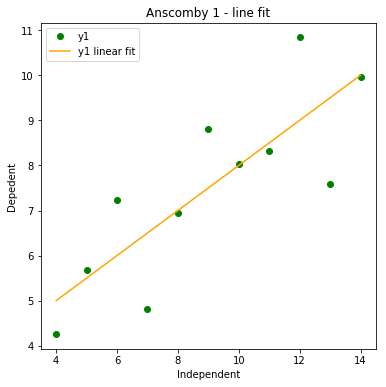

In [9]:
# Plot the data with the linear OLS fit for the y1 data
pl.figure(figsize = (6,6))
pl.plot(df['x'], df['y1'], 'go', label = 'y1')
pl.plot(df['x'], ols1.predict(df), '-', color = 'orange', label = 'y1 linear fit')
pl.xlabel('Independent')
pl.ylabel('Depedent')
pl.title('Anscomby 1 - line fit');
pl.legend();

**Caption**: Above is a plot of the y1 data (green circles) with a linear fit of the y1 data (orange line) produced using an OLS method. The linear fit appears to fit the data reasonably well.

In [10]:
# Create a new column in the dataframe for x^2
df['x2'] = df['x']**2

In [11]:
# Perform the quadratic fitting OLS method on the y1 dataset
ols2 = smf.ols(formula = 'y1 ~ x2 + x', data = df).fit()
ols2.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     8.793
Date:                Wed, 21 Nov 2018   Prob (F-statistic):            0.00956
Time:                        15:25:52   Log-Likelihood:                -16.487
No. Observations:                  11   AIC:                             38.97
Df Residuals:                       8   BIC:                             40.17
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7551      3.288      0.230      0.824        -6.827     8.338
x2            -0.0316      0.043     -0.729      0.487        -0.132     0.068
x              1.0693      0.790      1.354      0.213        -0.752     2.891
==============================================================================
Omnibus:                        0.167   Durbin-Watson:                   2.957
Prob(Omnibus):                  0.920   Jarque-Bera (JB):                0.302
Skew:                          -0.220   Prob(JB):                        0.860
Kurtosis:                       2.318   Cond. No.                         954.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

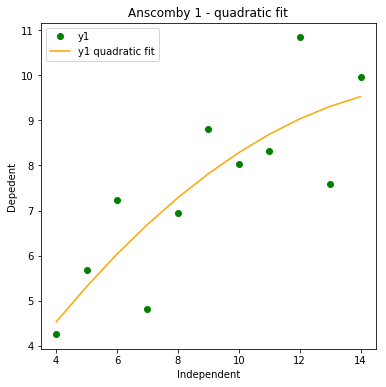

In [12]:
# Plot the data with the quadratic OLS fit for the y1 data
pl.figure(figsize = (6,6))
pl.plot(df['x'], df['y1'], 'go', label = 'y1')
pl.plot(df['x'], ols2.predict(df), '-', color = 'orange', label = 'y1 quadratic fit')
pl.xlabel('Independent')
pl.ylabel('Depedent')
pl.title('Anscomby 1 - quadratic fit');
pl.legend();

**Caption**: Above is a plot of the y1 data (green circles) with a quadratic fit of the y1 data (orange line) produced using an OLS method. The quadratic fit also appears to fit the data reasonably well. It is difficult to say just visually whether the linear fit (previous figure) or the quadratic fit is a better fit for the data. A mathematical method will be needed to evaluate which is the better fit.

In [13]:
# Use a mathematical method (Likelihood-ratio test) to compare which fit (linear or quadratic) is better for the y1 data
lrtest1 = ols2.compare_lr_test(ols1)
print(lrtest1)

(0.70794919019374447, 0.40012547285804223, 1.0)


## Do it yourself as homework:

### 1: Write down in words what this result means

The p-value of lrtest1 (0.400), printed above, indicates that we **cannot** reject the null hypothesis, at an alpha level of 0.05, that the restricted model (ols1, which is the linear fit) is better.

### 2: Do the same for the other series of data (y2)

In [14]:
# Perform the linear fitting OLS method on the y2 dataset
ols3 = smf.ols(formula = 'y2  ~ x', data = df).fit()
ols3.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Wed, 21 Nov 2018   Prob (F-statistic):            0.00218
Time:                        15:25:52   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.0009      1.125      2.667      0.026         0.455     5.547
x              0.5000      0.118      4.239      0.002         0.233     0.767
==============================================================================
Omnibus:                        1.594   Durbin-Watson:                   0.385
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.108
Skew:                          -0.567   Prob(JB):                        0.575
Kurtosis:                       1.936   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

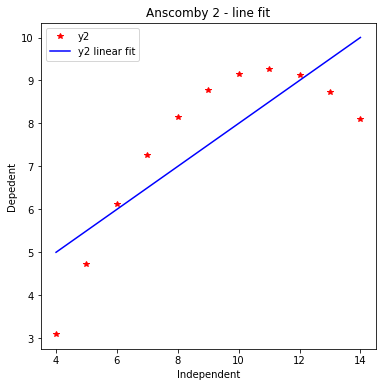

In [15]:
# Plot the data with the linear OLS fit for the y2 data
pl.figure(figsize = (6,6))
pl.plot(df['x'], df['y2'], 'r*', label = 'y2')
pl.plot(df['x'], ols3.predict(df), '-', color = 'blue', label = 'y2 linear fit')
pl.xlabel('Independent')
pl.ylabel('Depedent')
pl.title('Anscomby 2 - line fit');
pl.legend();

**Caption**: Above is a plot of the y2 data (red stars) with a linear fit of the y2 data (blue line) produced using an OLS method. The linear fit does not appear to fit the data well.

In [16]:
# Perform the quadratic fitting OLS method on the y2 dataset
ols4 = smf.ols(formula = 'y2 ~ x2 + x', data = df).fit()
ols4.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.378e+06
Date:                Wed, 21 Nov 2018   Prob (F-statistic):           8.64e-26
Time:                        15:25:53   Log-Likelihood:                 56.471
No. Observations:                  11   AIC:                            -106.9
Df Residuals:                       8   BIC:                            -105.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.9957      0.004  -1384.713      0.000        -6.006    -5.986
x2            -0.1267   5.71e-05  -2219.238      0.000        -0.127    -0.127
x              2.7808      0.001   2673.741      0.000         2.778     2.783
==============================================================================
Omnibus:                        2.566   Durbin-Watson:                   2.928
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.697
Skew:                           0.809   Prob(JB):                        0.428
Kurtosis:                       1.959   Cond. No.                         954.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

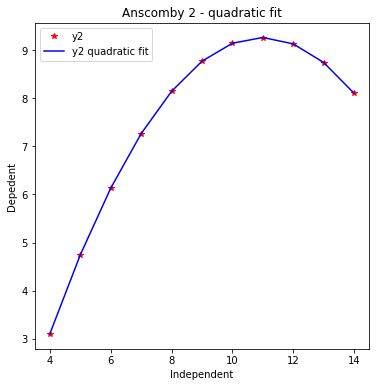

In [17]:
# Plot the data with the quadratic OLS fit for the y2 data
pl.figure(figsize = (6,6))
pl.plot(df['x'], df['y2'], 'r*', label = 'y2')
pl.plot(df['x'], ols4.predict(df), '-', color = 'blue', label = 'y2 quadratic fit')
pl.xlabel('Independent')
pl.ylabel('Depedent')
pl.title('Anscomby 2 - quadratic fit');
pl.legend();

**Caption**: Above is a plot of the y2 data (red stars) with a quadratic fit of the y2 data (blue line) produced using an OLS method. The quadratic fit appears to fit the data very well.

In [18]:
# Use a mathematical method (Likelihood-ratio test) to compare which fit (linear or quadratic) is better for the y2 data
lrtest2 = ols4.compare_lr_test(ols3)
print(lrtest2)

(146.63437980392047, 9.4331834208378821e-34, 1.0)


The p-value of lrtest2 (9.433e-34), printed above, indicates that we **can** reject the null hypothesis, at an alpha level of 0.05, that the restricted model (ols3, which is the linear fit) is better. This agrees with my visual observation that the quadratic fit (ols4) appears to fit the data well and that the linear fit (ols3) does not appear to fit the data well.

### 3: Use the value of the likelihood which you can find in the models summary and the formula for the likelihood ratio in the slides to derive the same result: you should be able to obtain the value of the statistics and by comparing it with a chisq table the relative p-value

As per the ols1, ols2, ols3, and ols4 summaries, their individual Log-Likelihood values are as follows:  

ols1 Log-Likelihood: -16.841  
ols2 Log-Likelihood: -16.487  
ols3 Log-Likelihood: -16.846  
ols4 Log-Likelihood: 56.471  

In [19]:
# Assign the Log-Likelihood values to variables
llOLS1 = -16.841
llOLS2 = -16.487
llOLS3 = -16.846
llOLS4 = 56.471

In [20]:
# Calculate the statistic value of the LR ratio test for the y1 data 
lr1 = -2*(llOLS1 - llOLS2)
print(lr1)

0.7080000000000055


![chi sq table](chisq.gif)

The chi-square table is shown above. The difference in degrees of freedom between ols1 and ols2 is 1. The value in the chi-square table that corresponds to an alpha level of 0.05 (as specified in the beginning of my notebook) and a degree of freedom equal to 1 is 3.841. The value of lr1 = 0.708, shown above, is less than 3.841, therefore we are unable to reject the null hypothesis that the restricted model (ols1, which is the linear fit) is better. This is the same result as before.

In [21]:
# Calculate the statistic value of the LR ratio test for the y2 data 
lr2 = -2*(llOLS3 - llOLS4)
print(lr2)

146.634


The chi-square table is shown above. The difference in degrees of freedom between ols3 and ols4 is 1. The value in the chi-square table that corresponds to an alpha level of 0.05 (as specified in the beginning of my notebook) and a degree of freedom equal to 1 is 3.841. The value of lr2 = 146.634, shown above, is greater than 3.841, therefore we can reject the null hypothesis that the restricted model (ols3, which is the linear fit) is better. This is the same result as before.